In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

import warnings
warnings.filterwarnings('ignore')

from PIL import Image
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import *

from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *
from tensorflow import keras

from utils import folders_tb as f
from utils import models as mo

In [2]:
data = []
labels = []
classes = 43
cur_path = f.curr_path() + os.sep + 'data' + os.sep + "Train"
cur_path

'c:\\Users\\Karina\\Desktop\\data_science_apr_2021\\machine_learning_project\\project\\data\\Train'

In [3]:
for i in os.listdir(cur_path):
    dir = cur_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (30,30), interpolation = cv2.INTER_NEAREST)
        data.append(img)
        labels.append(i)
        
x_train = np.array(data)
x_train = x_train / 255
y_train = np.array(labels).astype(np.float)

In [4]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(31367, 30, 30, 3) (31367,)
(7842, 30, 30, 3) (7842,)


Text(0, 0.5, 'Number of images')

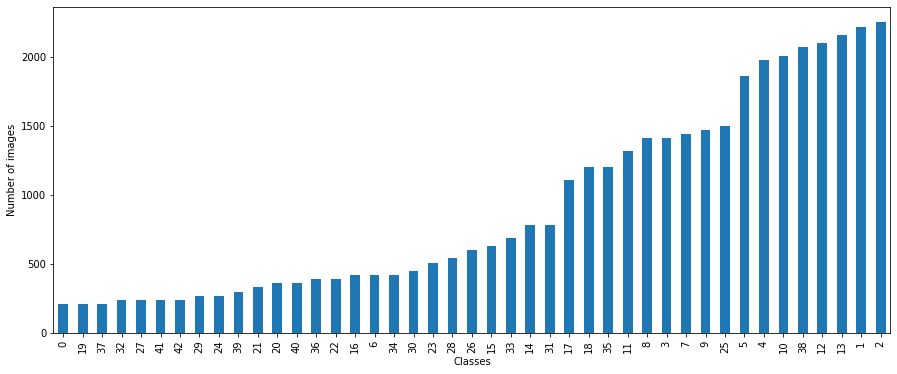

In [5]:
# number of images in each class
data_dic = {}
for folder in os.listdir(cur_path):
    data_dic[folder] = len(os.listdir(cur_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Classes')
plt.ylabel('Number of images')

In [6]:
model = mo.my_best_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        4864      
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         204928    
_________________________________________________________________
batch_normalization_2 (Batch (None, 9, 9, 128)         512       
_________________________________________________________________
dropout (Dropout)            (None, 9, 9, 128)         0

In [7]:
callback = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',factor=1e-1, patience=8, verbose=1, min_lr = 2e-6)
opt = Adam(learning_rate = 1e-3)

In [8]:
model.compile(optimizer = opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train ,y_train,  batch_size = 128, 
         epochs=10, validation_data = (x_valid, y_valid),
          callbacks=[callback, reduce_lr], shuffle = True)

Epoch 1/10
246/246 [==============================] - 57s 228ms/step - loss: 9.4299 - accuracy: 0.6887 - val_loss: 8.0120 - val_accuracy: 0.3504
Epoch 2/10
246/246 [==============================] - 59s 239ms/step - loss: 4.0817 - accuracy: 0.9026 - val_loss: 3.9960 - val_accuracy: 0.6769
Epoch 3/10
246/246 [==============================] - 59s 239ms/step - loss: 2.5038 - accuracy: 0.9246 - val_loss: 2.0628 - val_accuracy: 0.9660
Epoch 4/10
246/246 [==============================] - 59s 240ms/step - loss: 1.9509 - accuracy: 0.9377 - val_loss: 1.6707 - val_accuracy: 0.9686
Epoch 5/10
246/246 [==============================] - 54s 219ms/step - loss: 1.6744 - accuracy: 0.9449 - val_loss: 1.4558 - val_accuracy: 0.9527
Epoch 6/10
246/246 [==============================] - 54s 219ms/step - loss: 1.5217 - accuracy: 0.9474 - val_loss: 1.4555 - val_accuracy: 0.9621
Epoch 7/10
246/246 [==============================] - 54s 219ms/step - loss: 1.5020 - accuracy: 0.9460 - val_loss: 1.4275 - val_ac

In [10]:
model.save('../my_model_pruebaquinta.h5')

In [11]:
cur_path = f.curr_path() + os.sep + 'data' + os.sep + "Train"
test = pd.read_csv(f.curr_path() + os.sep + 'data' + os.sep + "Test.csv")
y_test = test["ClassId"].values
imgs = test["Path"].values
test_path = f.curr_path() + os.sep + 'data' 
data_test =[]
for img in imgs:
    image = cv2.imread(f.curr_path() + os.sep + 'data' +os.sep +img)
    image_fromarray = Image.fromarray(image, 'RGB')
    resize_image = image_fromarray.resize((30, 30))
    data_test.append(np.array( resize_image ))


In [12]:

x_test = np.array(data_test)
x_test = x_test/255
y_test = test["ClassId"].values


In [13]:
print(x_test.shape)
print(y_test.shape)

(12630, 30, 30, 3)
(12630,)


In [14]:
nuevo_model = keras.models.load_model('../my_model_pruebaquinta.h5')

In [15]:
nuevo_model.evaluate(x_test, y_test)

395/395 [==============================] - 8s 19ms/step - loss: 1.3979 - accuracy: 0.9424


[1.3978677988052368, 0.9424386620521545]